<a href="https://colab.research.google.com/github/AkshiSharma12/InstaBot/blob/master/concrete_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install concrete-autoencoder

In [15]:
from concrete_autoencoder import ConcreteAutoencoderFeatureSelector
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, Softmax
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
data_to_load = files.upload()

Saving data.csv to data.csv


In [5]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['data.csv']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Benign 357
Malignanat 212


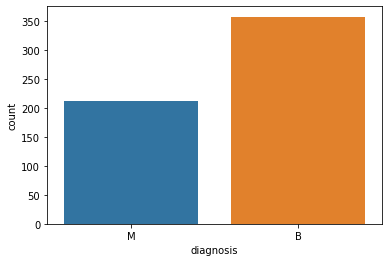

In [6]:
ax= sns.countplot(df['diagnosis'], label ='Count')
B,M = df['diagnosis'].value_counts()
print ('Benign', B)
print ('Malignanat', M)

In [7]:
del df['Unnamed: 32']

In [8]:
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X_train = np.reshape(X_train, (len(X_train), -1))
X_test = np.reshape(X_test, (len(X_test), -1))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(512, 30) (512, 2)
(57, 30) (57, 2)


In [14]:
def f(x):
    x = Dense(16)(x)
    x = LeakyReLU(0.2)(x)
    x = Dropout(0.1)(x)
    x = Dense(16)(x)
    x = LeakyReLU(0.2)(x)
    x = Dropout(0.1)(x)
    x = Dense(30)(x)
    return x

In [16]:
def g(x):
    x = Dense(16)(x)
    x = LeakyReLU(0.2)(x)
    x = Dropout(0.1)(x)
    x = Dense(16)(x)
    x = LeakyReLU(0.2)(x)
    x = Dropout(0.1)(x)
    x = Dense(10)(x)
    x = Softmax()(x)
    return x


In [24]:
import xgboost as xgb
model = xgb.XGBClassifier()

In [27]:
selector = ConcreteAutoencoderFeatureSelector(K = 5, output_function =f , num_epochs = 50)

In [28]:
selector.fit(X_train, X_train, X_test, X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:434: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
concrete_select (ConcreteSel (None, 5)                 151       
_________________________________________________________________
dense_15 (Dense)             (None, 16)                96        
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 16)                0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 16)                272       
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 16)                0   

In [29]:
selector.get_support(indices = True)

array([12, 19, 25,  2,  1])

In [30]:
selector.get_params

<bound method ConcreteAutoencoderFeatureSelector.get_params of <concrete_autoencoder.ConcreteAutoencoderFeatureSelector object at 0x7f86b4985ed0>>

In [31]:
selector.output_function

<function __main__.f>